# Data Exploration - Euklidische Distanz
## Imports

Wie bereits im Notebook DataExploration_Absolute_and_Relative_Endpoints beschrieben ist der Startpunkt nicht optimal. Der folgende Plot zeigt dies noch einmal.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Helpers

sns.set_style("whitegrid")
colors = {0:'tab:blue',1:'tab:orange',2:'tab:green'}

In [2]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)

df = pd.read_pickle("data.pickle")


In [3]:
#Create a new Datafram for start and endpoints of spiral search only
start_end_points = Helpers.get_dataframe_for_start_end_points()

In [4]:
# Starting and endpoints of all runs - Spiral search only - relative (delta) values
start_end_points = Helpers.get_relative_start_end_points(df, start_end_points)

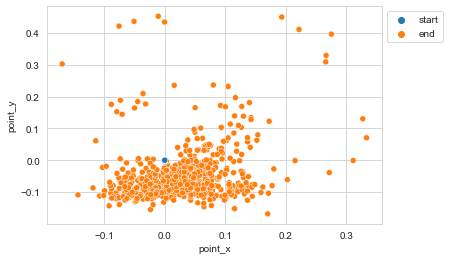

In [5]:
sns_plot = sns.scatterplot(data=start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

## Bestimmung des optimalen Startpunktes mithilfe der euklidischen Distanz
Im Folgenden werden wir die euklidische Distanz verwenden um einen Startpunkt zu finden welcher die minimale Entfernung zu allen relativen Endpunkten hat. Sollte solch ein Punkt gefunden werden, so gibt dieser direkt die nötigen Offset-Werte an, mit denen der Startpunkt verschoben werden muss, um die Spiralsuche zu beschleunigen. Wir gehen dabei so vor, dass wir einen Punkt, beginnend in minimaler x-Richtung und maximaler y-Richtung (also im Plot oben links), zeilenweise in maximale x-Richtung und minimale y-Richtung (also im Plot nach unten rechts) schrittweise verschieben. In jedem Schritt wird dabei die Summe über alle Distanzen von dem beweglichen Punkt zu allen Endpunkten berechnet und mit dem bis dahin bekannt minimalsten Wert verglichen.

![Optimaler Startpunkt durch minimale Summe der euklidischen Distanz](Bilder/Euklid_Funktionsweise.png)


Max y: 0.4531470000000013
Min y: -0.1688909999999737
Max x: 0.333202
Min x: -0.1693889999999989
Best Starting point x: 0.025611000000001185
Best Starting point y: -0.05685299999999903
Min distance: 50.09077549034872


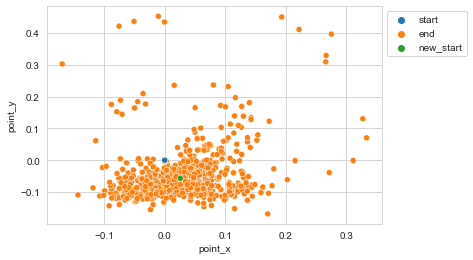

In [6]:
# Euklidische Distanz
def Euclidean_Dist(current_point, df2, cols=['point_x','point_y']):
    return np.linalg.norm(current_point - df2[cols].values, axis=1)

def euclidean_best_starting_point(points):
    max_y = start_end_points["point_y"].max()
    min_y = start_end_points["point_y"].min()
    min_x = start_end_points["point_x"].min()
    max_x = start_end_points["point_x"].max()

    print("Max y: " +  str(max_y))
    print("Min y: " +  str(min_y))
    print("Max x: " +  str(max_x))
    print("Min x: " +  str(min_x))

    best_point_x = 0
    best_point_y = 0

    current_x = min_x
    current_y = max_y

    # Set initially to large (or infinity) value
    min_distance = 1000000

    step = 0.005
    while(current_y > min_y or current_x < max_x):

        distances = Euclidean_Dist((current_x,current_y),points[points['start_or_end'] == 'end'])
        distances_sum = distances.sum()

        if distances_sum < min_distance:
            min_distance = distances_sum
            best_point_x = current_x
            best_point_y = current_y

        if current_x > max_x:
            current_x = min_x
            current_y = current_y - step
        else:
            current_x = current_x + step

    print("Best Starting point x: " + str(best_point_x))
    print("Best Starting point y: " + str(best_point_y))
    print("Min distance: " + str(min_distance))

    return pd.DataFrame({"run":"nan", "segment":"nan", "component":"nan", "start_or_end":"new_start", "point_x":best_point_x, "point_y":best_point_y, "point_z":"nan"}, index=[0])


#new_start_end_points = start_end_points.append({"run":"nan", "segment":"nan", "component":"nan", "start_or_end":"new_start", "point_x":best_point_x, "point_y":best_point_y, "point_z":"nan"}, ignore_index=True)
new_start_point = euclidean_best_starting_point(start_end_points)
new_start_end_points = start_end_points.append(new_start_point,ignore_index=True)
sns_plot = sns.scatterplot(data=new_start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

Der Plot zeigt uns, dass der alte Startpunkt nicht optimal ist. Es besteht die Möglichkeit zur Optimierung, da der ursprüngliche Startpunkt (blau) tendentiell zu weit in positiver y-Richtung liegt. Mithilfe der minimalen Summen der euklidischen Distanz zu allen Endpunkten haben wir nun einen neuen Startpunkt bestimmt (grün). Um die Suche somit zu beschleunigen wäre es also notwendig ein Offset von 0,02561 in x-Richtung und -0,05685 in y-Richtung hinzuzufügen.

### Ausreißer entfernen
Wir betrachten nun alle Endpunkte mit x- und y-Wert > 0,2 als Ausreißer. Diese werden daher bei der folgenden Untersuchung außen vor gelassen.

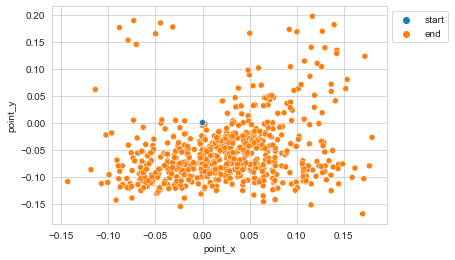

In [7]:
# Remove Outliers (Points with value > 0.2)
no_outlier_df = start_end_points.loc[start_end_points['point_x'] < 0.2 ]
no_outlier_df = no_outlier_df.loc[no_outlier_df['point_y'] < 0.2 ]

#no_outlier_df.describe()
sns_plot = sns.scatterplot(data=no_outlier_df, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

Der Plot zeigt den Datensatz, nachdem die Ausreißer entfernt wurden.

Max y: 0.4531470000000013
Min y: -0.1688909999999737
Max x: 0.333202
Min x: -0.1693889999999989
Best Starting point x: 0.020611000000001184
Best Starting point y: -0.05685299999999903
Min distance: 42.46930739271411


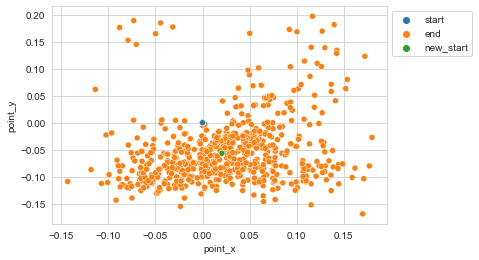

In [8]:
new_start_point = euclidean_best_starting_point(no_outlier_df)
new_start_end_points = no_outlier_df.append(new_start_point,ignore_index=True)
sns_plot = sns.scatterplot(data=new_start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

Nachdem die Ausreißer entfernt wurden, ergibt sich mit der Methode der minimalen Summe der euklidischen Distanzen ein x-Offset von 0.00206, sowie ein y-Offset von -0.056852. Um die Spiralsuche zu beschleunigen, sollte der Startpunkt folglich um diese Werte verschoben werden.